# Ejercicio 1

## 1) 
Generar una muestra de tamaño N = 10000 correspondiente a la altura de personas adultas, asumiendo que su densidad de probabilidad es una función normal/gaussiana con μ= 1.78m y σ= 0.1 m. Dibuja la densidad de frecuencia y la densidad de probabilidad por separado. Compara μ y σ con la media muestral y la varianza muestral.

In [1]:
# Carga de paquetes
library(ggplot2)
library(scales)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



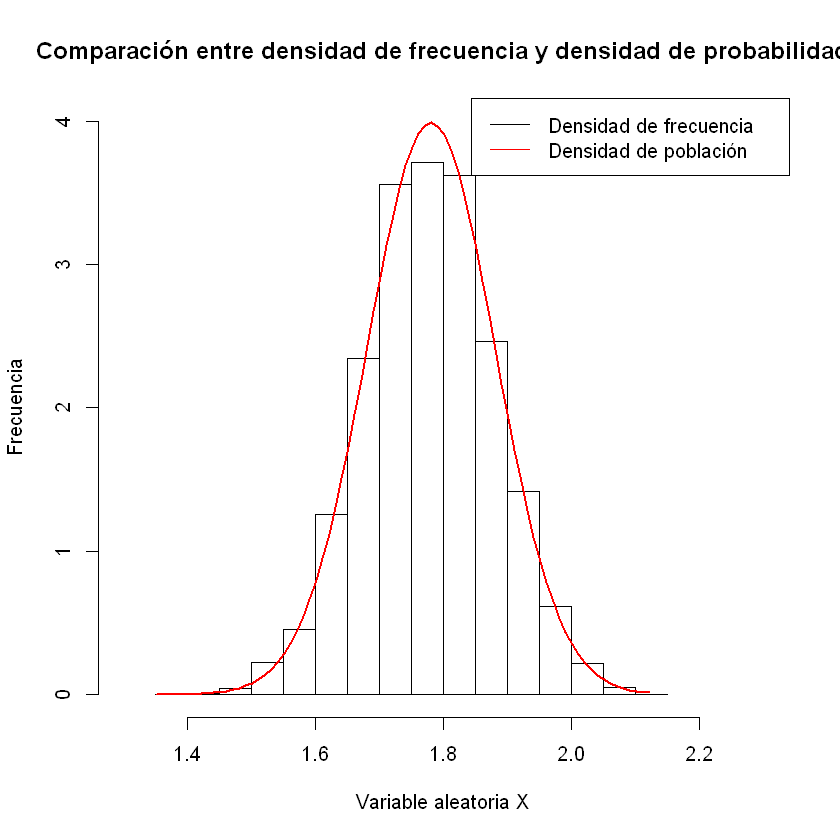

In [2]:
N = 10000
mu = 1.78
sigma = 0.1

muestra = rnorm(N, mean = mu, sd = sigma)
hist(muestra, freq = F, ylim = c(0,4), xlim = c(1.3,2.3),
     main = "Comparación entre densidad de frecuencia y densidad de probabilidad",
     xlab = "Variable aleatoria X",
     ylab = "Frecuencia")
x = seq(min(muestra), max(muestra), by = 0.01)
lines(x, y = dnorm(x, mean = mu, sd = sigma), col = "red", lwd = 2)

legend(x = "topright", legend = c("Densidad de frecuencia", "Densidad de población"),
       col=c("black", "red"), lwd = 1)

Como podemos apreciar, la densidad de frecuencias se asemeja a la pdf gaussiana. Cuanto mayor sea el tamaño N, más se acercará a la pdf, hecho que estudiaremos en el apartado siguiente. Si comparamos la media $\mu$ con la media muestral, y la desviación estándar $\sigma$ con la raíz de la varianza muestral, obtenemos los siguientes resultados:

In [3]:
print("Comparación de medias:")
print(paste0("Mu = ", mu, "; mean = ", mean(muestra)))
print("Comparación de desviaciones estándar:")
print(paste0("Sigma = ", sigma, "; std = ", sqrt(var(muestra))))

[1] "Comparación de medias:"
[1] "Mu = 1.78; mean = 1.77838312834529"
[1] "Comparación de desviaciones estándar:"
[1] "Sigma = 0.1; std = 0.100573170043602"


Nuevamente, vemos que los estimadores sobre la muestra se asemejan enormemente a $\mu$ y $\sigma$ respectivamente, gracias al elevado tamaño muestral N.

## 2) 
Considerar la distribución de probabilidad anterior y el estimador media muestral para una muestra de tamaño N (muN).
1) Generar un número alto M = 10000 de pseudo-muestras y pintar la distribución (μ-muN), para N = 10, 100, 1000, 10000.

2) Asumiendo que el valor esperado puede calcularse como el promedio a los M pseudo-experimentos. Calcular el valor esperado para cada muN y dibujar el resultado en función de N.

3) Asumiendo que la varianza puede calcularse como la varianza a los M pseudo-experimentos. Calcular la varianza para cada muN y dibujar el resultado en función de N.

## 3)
Repetir 2) pero usando el estimador “varianza muestral” (con la fórmula sesgada).

## 4)
Repetir 2) pero usando el estimador “mediana muestral” (con la fórmula sesgada).¿Cuál de los dos estimadores (media muestral o mediana muestral es más eficiente?

Para ahorrar tiempo de cómputo, realizaremos los tres apartados dentro del mismo bucle:

In [4]:
M = 10000
idx = c(10, 100, 1000, 10000)

dfPlot = data.frame(
      Size = c(),
      Value = c()
)

dfMean = data.frame(
      Size = c(),
      Mean = c(),
      Variance = c()
)

dfVar = data.frame(
      Size = c(),
      Mean = c(),
      Variance = c()
)

dfMedian = data.frame(
      Size = c(),
      Mean = c(),
      Variance = c()
)

# Bucle para los diferentes tamaños
for(N in idx){
    Muestras = matrix(data = NA, nrow = N, ncol = M)

    # Bucle para generar las diferentes simulaciones
    for(i in 1:M){
      Muestras[,i] = rnorm(N, mean = mu, sd = sigma)
    }

    # Cálculo de mu-mean
    d = mu - colMeans(Muestras)
    # Estimador media
    Means = apply(X = Muestras, MARGIN = 2, FUN = mean)
    # Estimador varianza (Utilizamos el estimador sesgado)
    Vars = apply(X = Muestras, MARGIN=2, FUN=function(x) {return(sum((x-mean(x))^2)/length(x))})
    # Estimador mediana
    Medians = apply(X = Muestras, MARGIN = 2, FUN = median)

    ##### Añadimos a los dataframes para plotear #####
    # Distribución de distancias
    dfAdd = data.frame(
        Size = rep(as.character(N), N),
        Value = d
    )
    dfPlot = rbind(dfPlot, dfAdd)

    ## ESTIMADOR MEDIA
    dfAdd = data.frame(
        Size = N,
        Mean = mean(Means),
        Variance = var(Means)
    )
    dfMean = rbind(dfMean, dfAdd)
    
    ## ESTIMADOR VARIANZA
    dfAdd = data.frame(
        Size = N,
        Mean = mean(Vars),
        Variance = var(Vars)
    )
    dfVar = rbind(dfVar, dfAdd)

    ## ESTIMADOR MEDIANA
    dfAdd = data.frame(
        Size = N,
        Mean = mean(Medians),
        Variance = var(Medians)
    )
    dfMedian = rbind(dfMedian, dfAdd)
}

Comenzamos comparando las distribuciones de la función $\mu - \bar{x}_N$. Esta distribución nos indica cuánto se parecen $\mu$ y el valor estimado de la media para cada tamaño muestral N.

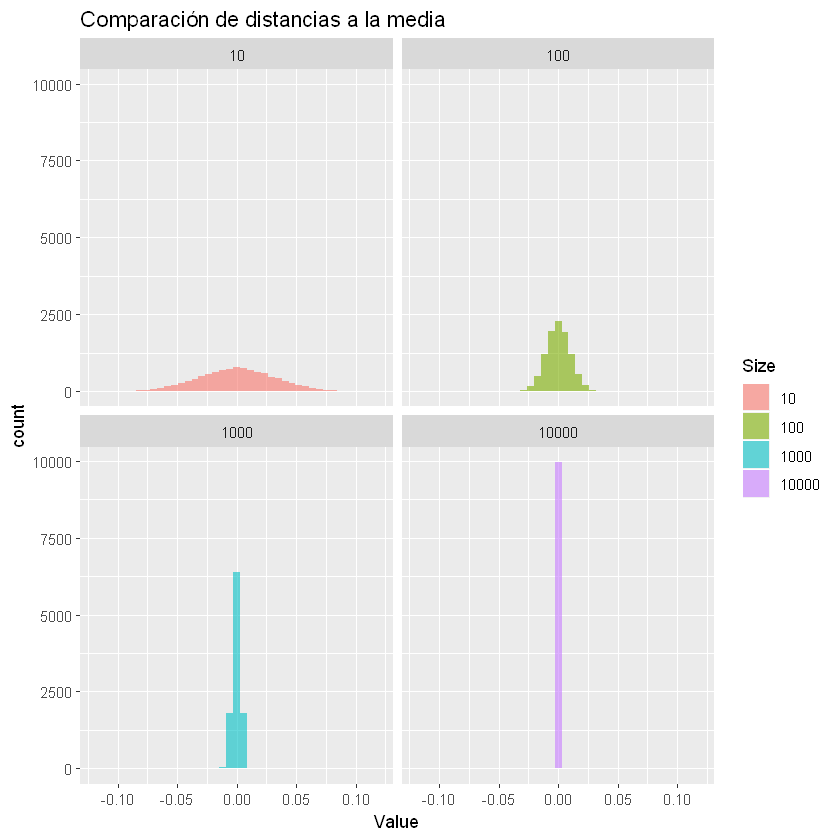

In [5]:
bins = 40
bw = (max(dfPlot$Value)-min(dfPlot$Value))/bins
ggplot(dfPlot, aes(x = Value, fill = Size)) +
  geom_histogram(alpha=0.6, binwidth = bw) +
  facet_wrap(vars(Size)) +
  ggtitle("Comparación de distancias a la media")

Como podemos observar, conforme aumentamos el tamaño muestral la distribución (con media nula), esta se va estrechando hasta que prácticamente todos los valores caen en el bin central. Esto indica que a mayor N existe una mayor semejanza entre la media de la pdf $\mu$ y la media muestral.

A continuación, representamos la media y desviación de los diferentes estimadores utilizados: media muestral, varianza muestral (sesgado) y mediana muestral.

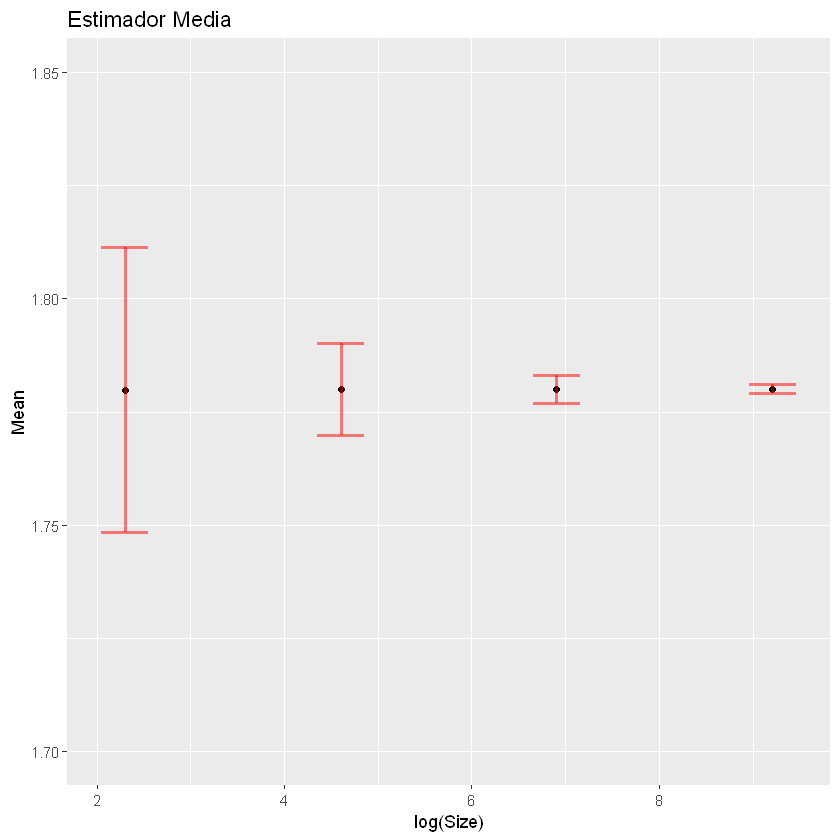

In [6]:
ggplot(dfMean, aes(x = log(Size), y = Mean)) + 
  geom_point() + 
  geom_errorbar(aes(x = log(Size), ymin = Mean - sqrt(Variance), ymax = Mean + sqrt(Variance)),
                  width = 0.5, colour = "red", alpha=0.5, size = 1) +
  ylim(1.70,1.85) + 
  ggtitle("Estimador Media")

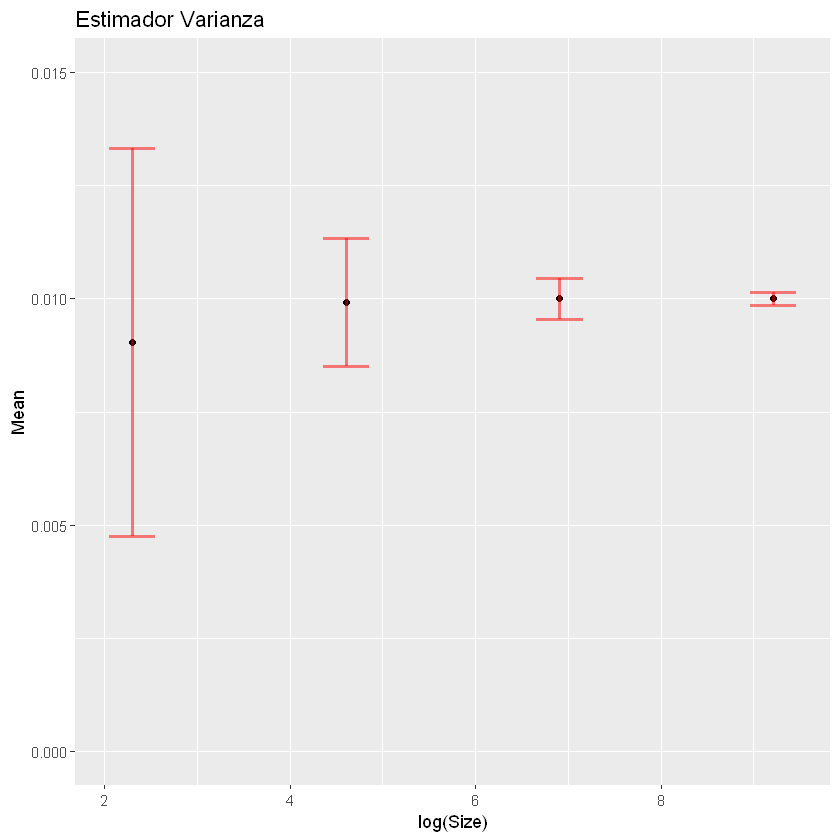

In [7]:
ggplot(dfVar, aes(x = log(Size), y = Mean)) + 
  geom_point() + 
  geom_errorbar(aes(x = log(Size), ymin = Mean - sqrt(Variance), ymax = Mean + sqrt(Variance)),
                  width = 0.5, colour = "red", alpha=0.5, size = 1) +
  ylim(0,0.015) + 
  ggtitle("Estimador Varianza")

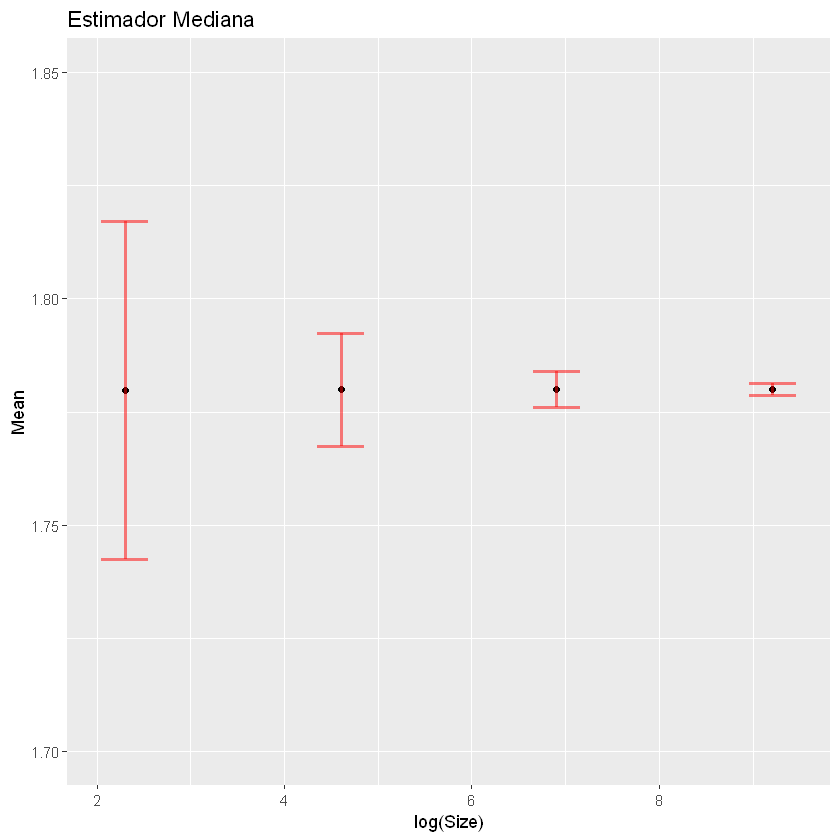

In [8]:
ggplot(dfMedian, aes(x = log(Size), y = Mean)) + 
  geom_point() + 
  geom_errorbar(aes(x = log(Size), ymin = Mean - sqrt(Variance), ymax = Mean + sqrt(Variance)),
                  width = 0.5, colour = "red", alpha=0.5, size = 1) +
  ylim(1.70,1.85) + 
  ggtitle("Estimador Mediana")

Se puede apreciar como para los tres estimadores conforme aumentamos el tamaño muestral N se aproximan más a los valores de la pdf ($\mu$ para los estimadores media y mediana, $\sigma^2$ para la varianza), y además disminuye el error cometido, calculado la desviación estándar del estimador y representado gráficamente mediante las barras de error.

Finalmente, para responder a la pregunta de qué estimador es más eficiente, media muestral o mediana muestral, comparamos sus varianzas: aquel que tenga menor varianza será más eficiente.

In [9]:
eff = data.frame( VarMean = dfMean$Variance, VarMedian = dfMedian$Variance)
eff

VarMean,VarMedian
9.940990e-04,1.388519e-03
1.015750e-04,1.560207e-04
9.945951e-06,1.559722e-05
1.002495e-06,1.541556e-06


Como la varianza del estimador media es menor para todo valor de N, podemos concluir que dicho estimador es más eficiente.